<a href="https://colab.research.google.com/github/tai-yuan0624/bigdata/blob/main/0518%E4%BD%9C%E6%A5%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
install.packages("SportsAnalytics")
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [59]:
library(SportsAnalytics)
library(ggplot2)

In [60]:
NBA1718<- fetch_NBAPlayerStatistics("17-18")

`geom_smooth()` using formula 'y ~ x'



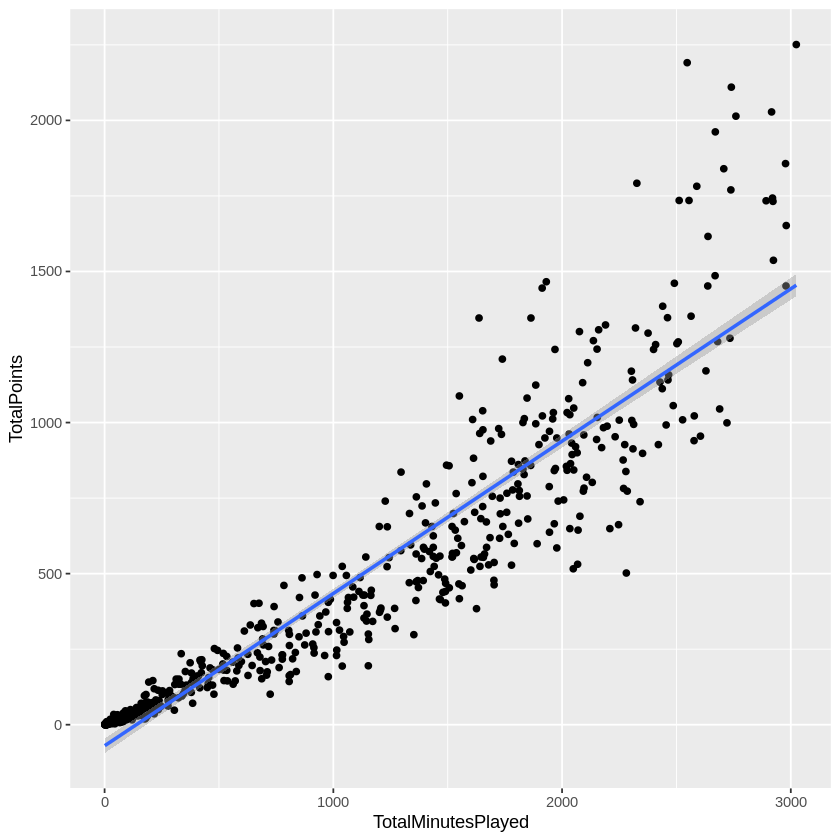

In [61]:
ggplot(NBA1718,aes(x=TotalMinutesPlayed,y=TotalPoints))+ geom_point()+geom_smooth(method = "glm")

In [62]:
lm(TotalPoints~TotalMinutesPlayed,data =NBA1718)


Call:
lm(formula = TotalPoints ~ TotalMinutesPlayed, data = NBA1718)

Coefficients:
       (Intercept)  TotalMinutesPlayed  
           -69.798               0.504  


In [63]:
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted, data =NBA1718)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted, 
    data = NBA1718)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
          -12.08194             -0.00901              1.29193  

Degrees of Freedom: 539 Total (i.e. Null);  537 Residual
Null Deviance:	    1.2e+08 
Residual Deviance: 2180000 	AIC: 6020

In [64]:
mydata <- read.csv("https://raw.githubusercontent.com/CGUIM-BigDataAnalysis/BigDataCGUIM/master/binary.csv")

In [65]:
mydata$rank<- factor(mydata$rank)
mylogit <- glm(admit ~ gre +gpa +rank,
data =mydata, family ="binomial")
sum<-summary(mylogit)
sum$coefficients

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-3.9900,1.1400,-3.5,0.00047
gre,0.0023,0.0011,2.1,0.03847
gpa,0.8040,0.3318,2.4,0.01539
rank2,-0.6754,0.3165,-2.1,0.03283
rank3,-1.3402,0.3453,-3.9,0.00010
rank4,-1.5515,0.4178,-3.7,0.00020


In [66]:
install.packages("rpart")
library(rpart)
DT <-rpart(Position~Blocks+ThreesMade+Assists+Steals,data=NBA1718)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



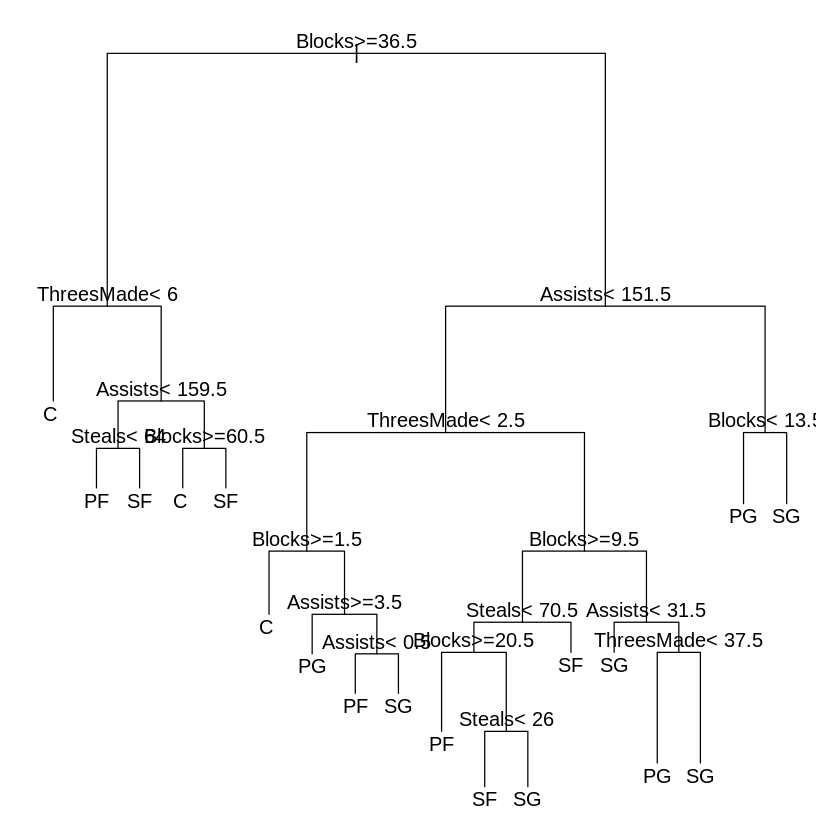

In [67]:
par(mfrow=c(1,1),mar = rep(1,4))
plot(DT)
text(DT,use.n=F, all=F, cex=1)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



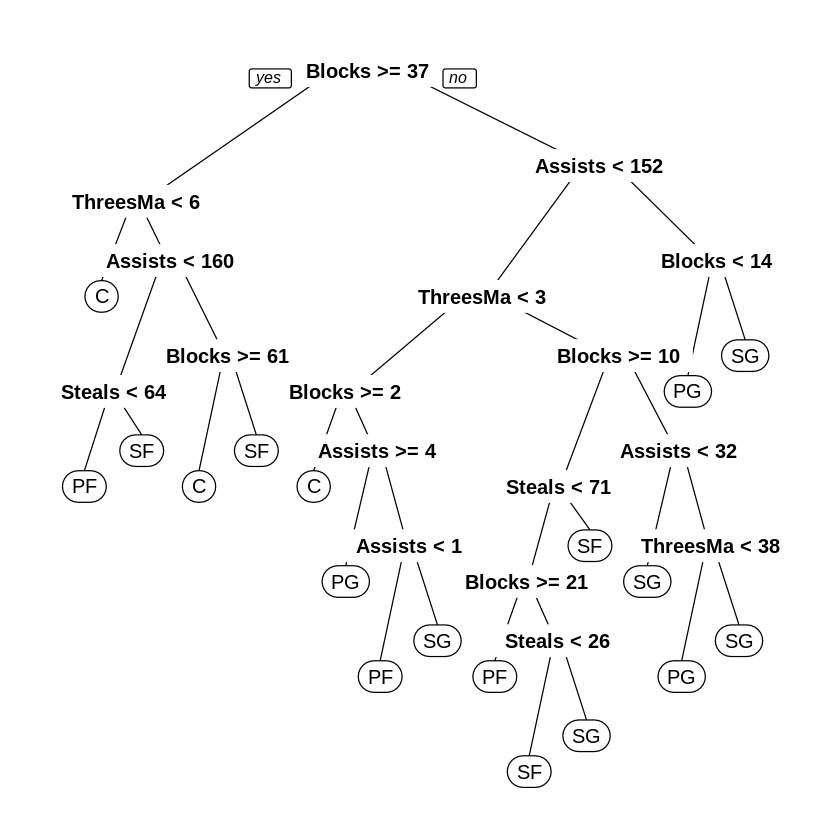

In [68]:
install.packages("rpart.plot")
library(rpart.plot)
prp(DT)

In [69]:
install.packages("arules")
library(arules)

installed.packages("datasets")
library(datasets)
data(Groceries)
Groceries@data@Dim

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Package,LibPath,Version,Priority,Depends,Imports,LinkingTo,Suggests,Enhances,License,License_is_FOSS,License_restricts_use,OS_type,Archs,MD5sum,NeedsCompilation,Built


[1]  169 9835

In [31]:
rules<-apriori(Groceries,
parameter = list(supp =0.001,conf=0.8),
control =list(verbose=F))
options(digits=2)
inspect(rules[1:5])

    lhs                        rhs            support confidence coverage lift
[1] {liquor,red/blush wine} => {bottled beer} 0.0019  0.90       0.0021   11.2
[2] {curd,cereals}          => {whole milk}   0.0010  0.91       0.0011    3.6
[3] {yogurt,cereals}        => {whole milk}   0.0017  0.81       0.0021    3.2
[4] {butter,jam}            => {whole milk}   0.0010  0.83       0.0012    3.3
[5] {soups,bottled beer}    => {whole milk}   0.0011  0.92       0.0012    3.6
    count
[1] 19   
[2] 10   
[3] 17   
[4] 10   
[5] 11   


In [36]:
rulesR<-apriori(data=Groceries,parameter=list(supp=0.001,conf=0.08),
appearance=list(default="lhs",rhs="whole milk"),
control=list(verbose=F))
rulesR<-sort(rulesR, decreasing=TRUE,by="confidence")
inspect(rulesR[1:5])

    lhs                     rhs          support confidence coverage lift count
[1] {rice,                                                                     
     sugar}              => {whole milk}  0.0012          1   0.0012  3.9    12
[2] {canned fish,                                                              
     hygiene articles}   => {whole milk}  0.0011          1   0.0011  3.9    11
[3] {root vegetables,                                                          
     butter,                                                                   
     rice}               => {whole milk}  0.0010          1   0.0010  3.9    10
[4] {root vegetables,                                                          
     whipped/sour cream,                                                       
     flour}              => {whole milk}  0.0017          1   0.0017  3.9    17
[5] {butter,                                                                   
     soft cheese,                       

In [37]:
rulesR<-apriori(data=Groceries,parameter=list(supp=0.001,conf=0.08),
appearance=list(default="lhs",rhs="bottled beer"),
control=list(verbose=F))
rulesR<-sort(rulesR, decreasing=TRUE,by="confidence")
inspect(rulesR[1:5])

    lhs                        rhs            support confidence coverage lift
[1] {liquor,red/blush wine} => {bottled beer} 0.0019  0.90       0.0021   11.2
[2] {soda,liquor}           => {bottled beer} 0.0012  0.57       0.0021    7.1
[3] {liquor}                => {bottled beer} 0.0047  0.42       0.0111    5.2
[4] {herbs,bottled water}   => {bottled beer} 0.0012  0.40       0.0031    5.0
[5] {whole milk,soups}      => {bottled beer} 0.0011  0.38       0.0029    4.7
    count
[1] 19   
[2] 12   
[3] 46   
[4] 12   
[5] 11   


In [42]:
rulesL<-apriori(data=Groceries,parameter=list(supp=0.001,conf=0.15,minlen=2),
appearance=list(default="rhs",lhs="whole milk"),
control=list(verbose=F))
rulesL<-sort(rulesL, decreasing=TRUE,by="confidence")
inspect(rulesL[1:5])

    lhs             rhs                support confidence coverage lift count
[1] {whole milk} => {other vegetables} 0.075   0.29       0.26     1.5  736  
[2] {whole milk} => {rolls/buns}       0.057   0.22       0.26     1.2  557  
[3] {whole milk} => {yogurt}           0.056   0.22       0.26     1.6  551  
[4] {whole milk} => {root vegetables}  0.049   0.19       0.26     1.8  481  
[5] {whole milk} => {tropical fruit}   0.042   0.17       0.26     1.6  416  


In [43]:
rulesL<-apriori(data=Groceries,parameter=list(supp=0.001,conf=0.15,minlen=2),
appearance=list(default="rhs",lhs="bottled beer"),
control=list(verbose=F))
rulesL<-sort(rulesL, decreasing=TRUE,by="confidence")
inspect(rulesL[1:5])

    lhs               rhs                support confidence coverage lift count
[1] {bottled beer} => {whole milk}       0.020   0.25       0.081    0.99 201  
[2] {bottled beer} => {soda}             0.017   0.21       0.081    1.21 167  
[3] {bottled beer} => {other vegetables} 0.016   0.20       0.081    1.04 159  
[4] {bottled beer} => {bottled water}    0.016   0.20       0.081    1.77 155  
[5] {bottled beer} => {rolls/buns}       0.014   0.17       0.081    0.92 134  


In [56]:
NBA1920<- fetch_NBAPlayerStatistics("19-20")

`geom_smooth()` using formula 'y ~ x'



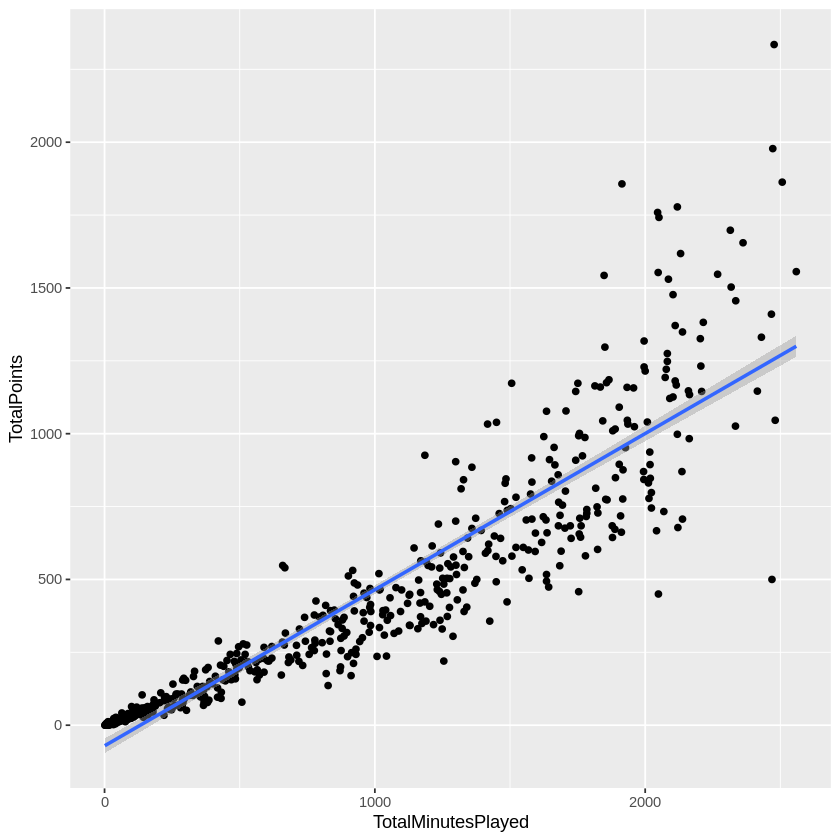

In [57]:
ggplot(NBA1920,aes(x=TotalMinutesPlayed,y=TotalPoints))+ geom_point()+geom_smooth(method = "glm")

In [70]:
lm(TotalPoints~TotalMinutesPlayed,data =NBA1920)


Call:
lm(formula = TotalPoints ~ TotalMinutesPlayed, data = NBA1920)

Coefficients:
       (Intercept)  TotalMinutesPlayed  
           -70.816               0.536  


In [71]:
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted, data =NBA1920)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted, 
    data = NBA1920)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
           -11.3738              -0.0117               1.3224  

Degrees of Freedom: 528 Total (i.e. Null);  526 Residual
Null Deviance:	    9.6e+07 
Residual Deviance: 2e+06 	AIC: 5860

In [44]:
rulesR<-apriori(data=Groceries,parameter=list(supp=0.001,conf=0.08),
appearance=list(default="lhs",rhs="domestic eggs"),
control=list(verbose=F))
rulesR<-sort(rulesR, decreasing=TRUE,by="confidence")
inspect(rulesR[1:5])

    lhs                   rhs             support confidence coverage lift count
[1] {citrus fruit,                                                              
     other vegetables,                                                          
     whole milk,                                                                
     cream cheese }    => {domestic eggs}  0.0011       0.58   0.0019  9.1    11
[2] {citrus fruit,                                                              
     whole milk,                                                                
     cream cheese }    => {domestic eggs}  0.0016       0.57   0.0028  9.0    16
[3] {whole milk,                                                                
     cream cheese ,                                                             
     sugar}            => {domestic eggs}  0.0011       0.55   0.0020  8.7    11
[4] {citrus fruit,                                                              
     whole milk,            

In [48]:
rulesL<-apriori(data=Groceries,parameter=list(supp=0.001,conf=0.15,minlen=2),
appearance=list(default="rhs",lhs="domestic eggs"),
control=list(verbose=F))
rulesL<-sort(rulesL, decreasing=TRUE,by="confidence")
inspect(rulesL[1:5])

    lhs                rhs                support confidence coverage lift
[1] {domestic eggs} => {whole milk}       0.030   0.47       0.063    1.9 
[2] {domestic eggs} => {other vegetables} 0.022   0.35       0.063    1.8 
[3] {domestic eggs} => {rolls/buns}       0.016   0.25       0.063    1.3 
[4] {domestic eggs} => {root vegetables}  0.014   0.23       0.063    2.1 
[5] {domestic eggs} => {yogurt}           0.014   0.23       0.063    1.6 
    count
[1] 295  
[2] 219  
[3] 154  
[4] 141  
[5] 141  
